## This project is part of the Udacity Data Analyst Nanodegree program and its purpose is to practice using pandas and numpy to wrangle and present data in graphical form.

### I have chosen 3 questions that I will attempt to answer below.
    
   #### 1) Is there a relationship between Weight and At Bats per Homerun?
   #### 2) Is there a relationship between Age and Walks per Strikeout?
   #### 3) Are there trends in the Birth months of players with a .300 or higher career batting average?
   <br>

In [47]:
# this is where all the needed libraries are imported

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import unicodecsv
import pandas as pd
from IPython.display import display, HTML
import numpy as np  
np.seterr(divide='ignore', invalid='ignore')
import calendar

***
### 1. **Is there a relationship between a players' weight and 'At Bats per Home Run '?**
 
   *Hypothesis: I would think that having more weight would give some advantage in hitting home runs (fewer at bats per home run)*

,ABpHR,weight
count,7670.000000,7670.000000
mean,145.923729,186.202608
std,219.365494,20.906747
min,2.000000,125.000000
25%,38.000000,170.000000
50%,74.000000,185.000000
75%,162.000000,198.000000
max,4251.000000,320.000000


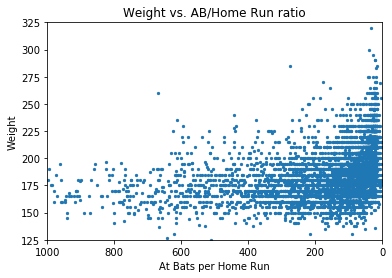

,ABpHR,weight
ABpHR,1.000000,-0.300639
weight,-0.300639,1.000000


In [48]:
# a function that will be applied to each group.
# in this case, each player
def aggData(grp):
    if np.sum(grp['AB']) and np.sum(grp['AB']) > 0 and np.sum(grp['H']) > 0 and np.sum(grp['HR']) > 0:
        grp['ABpHR'] = np.sum(grp['AB'])/np.sum(grp['HR'])
    else:
        grp['ABpHR'] = 0

    return grp

# create panda dataframes from the master CSV files
batting_df = pd.read_csv('Batting.csv')
master_df = pd.read_csv('Master.csv')

# once the above function is applied, one new column is created. It will have
# the same values for each player (and the rest of the dataframe will remain
# the same): AB per Home Run:
batting_grouped = batting_df.groupby('playerID', as_index=False).apply(aggData)

# merge the dataset, by player id, to add stats for weight:
batting_merged = pd.merge(left=batting_grouped, right=master_df[['playerID','weight','height']], on='playerID', how='left')

# select wanted columns from merged dataframe, group by playerID
batting_merged_player = batting_merged[['playerID','ABpHR','weight']].groupby('playerID', as_index=False).first()

# only keep records where AB per HR ratio is not 0
batting_merged_player = batting_merged_player[(batting_merged_player.ABpHR != 0.000000)]

# only keep recrods where weight value is finite
batting_merged_player = batting_merged_player[np.isfinite(batting_merged_player['weight'])]

fig, ax = plt.subplots()

# I inverted the x axis because a lower ratio of AB to Hr is actually better, so it allowed the plot to show
# a better model of what I was trying to prove
ax.invert_xaxis() 

display(batting_merged_player.describe())
plt.scatter(batting_merged_player.ABpHR,batting_merged_player.weight, s=5)

# I changed the y limits to more or less the weight range of MLB players
plt.ylim(125,325)
plt.xlim(1000,0)
plt.title('Weight vs. AB/Home Run ratio')
plt.xlabel('At Bats per Home Run')
plt.ylabel('Weight')
plt.show()
batting_merged_player.corr()

**Discussion:** I decided to eliminate all records where the ratio of ABs to HR was 0 as these don't contribute any information to the question I was trying to answer, I also eliminated all records with an infinite weight value.

**Limitations:** There were some players who did not have a weight recorded in the original database. I was unable to include any players who never hit a home run, though the amount of players who never hit a home run despite a significant numer of at bats was not many. The data excludes all statistics after the 2014 season.

**Conclusion:** The correlation value of -0.3 shows that there is a low/moderate correlation between these variables, as the weight goes up, the AB per HR seems to goes down, but we don't have enough information to claim a definitive relationship between these two variables

<br>
***
### 2 **Is there a relationship between a players' age and their patience at the plate (expressed in a BB to SO ratio)?**

   *Hypothesis: I would think that the older a player gets, the more patient they become as hitters*

count    73898.000000
mean         0.600219
std          0.757654
min          0.000000
25%          0.125000
50%          0.421053
75%          0.815688
max         18.666667
Name: BBvsK, dtype: float64

count    73898.000000
mean        28.367479
std          4.351388
min         16.000000
25%         25.000000
50%         28.000000
75%         31.000000
max         59.000000
Name: Age, dtype: float64

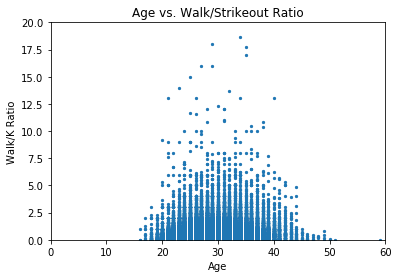

,Age,BBvsK
Age,1.000000,0.125563
BBvsK,0.125563,1.000000


In [49]:
# create panda dataframes from the master CSV files

batting_df = pd.read_csv('Batting.csv')
master_df = pd.read_csv('Master.csv')

# merge the dataset, by player id, to add stats for birth year:

batting_merged = pd.merge(left=batting_df, right=master_df[['playerID','birthYear']], on='playerID', how='left')

# only keep records that don't have Nan in the yearID or birthYear columns
batting_merged = batting_merged[~np.isnan(batting_merged['yearID']) & ~np.isnan(batting_merged['birthYear'])].copy()

# convert string value to float
batting_merged['Age'] = (batting_merged['yearID'].apply(np.float64)) -(batting_merged['birthYear'].apply(np.float64))

# calculate walk to striketout ratio by dividing walks by strikeouts
batting_merged['BBvsK'] = (batting_merged['BB'].apply(np.float64))/(batting_merged['SO'].apply(np.float64))

# only keep records where BBvsK is not NaN or Inf
batting_merged = batting_merged[~np.isnan(batting_merged['BBvsK']) & ~np.isinf(batting_merged['BBvsK'])].copy()

# select wanted columns from dataframe
batting_merged = batting_merged[['playerID','birthYear','yearID','Age','BBvsK']]

# replace all inf values with Nan, drop all records with a Nan
batting_merged.replace(np.inf, np.nan).dropna(axis=0, how='all')

display(batting_merged['BBvsK'].describe())
display(batting_merged['Age'].describe())

fig, ax = plt.subplots()
plt.scatter(batting_merged['Age'],batting_merged['BBvsK'], s=5)
plt.xlim(0,60)
plt.ylim(0,20)
plt.title('Age vs. Walk/Strikeout Ratio')
plt.xlabel('Age')
plt.ylabel('Walk/K Ratio')
plt.show()
batting_merged = batting_merged[['Age','BBvsK']]
display(batting_merged.corr())

**Discussion:** I decided to eliminate all records where the yearID, birthID, or BBvsK ratio was Nan or Inf.

**Limitations:** I was unable to include players who never walked or never struck out, though this doesn't describe many players. The data excludes all statistics after the 2014 season.

**Conclusion:** Surprisingly, the data shows that players' patience peaks around the age of 30 and then starts to come down again. The correlation value of 0.12 shows that there is no meaningful relationship between these 2 variables over the whole range of ages, but it is interesting to note that the trend of the data before and after age 30, as shown in the following plots, shows a possible slight positive correlation up until age 30 and then a slight negative correlation from age 30 onwards:

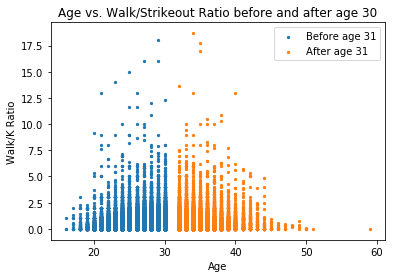

In [50]:
batting_merged1 = batting_merged[batting_merged['Age'] <= 30]
batting_merged2 = batting_merged[batting_merged['Age'] > 31]

plt.scatter(batting_merged1['Age'],batting_merged1['BBvsK'], s=5)
plt.scatter(batting_merged2['Age'],batting_merged2['BBvsK'], s=5)

plt.title('Age vs. Walk/Strikeout Ratio before and after age 30')
#plt.legend(loc='upper left', numpoints=1, ncol=3, fontsize=8, bbox_to_anchor=(1,1))
plt.legend(["Before age 31", "After age 31"]);
plt.xlabel('Age')
plt.ylabel('Walk/K Ratio')

<br>
***
### 3 **Birth Month for over .300 hitter**
   *Just for fun, find if there is a trend in birth months for players with a .300 or  higher career batting average*

90

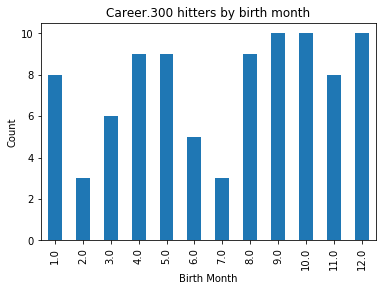

In [51]:
# create a function that will be applied to each group.
# in this case, each player
def aggData(grp):
    if np.sum(grp['AB']) > 0 and np.sum(grp['H']) > 0:
        grp['BAVG'] = np.sum(grp['H'])/np.sum(grp['AB'])
    else:
        # can use 'np.nan' here (?)
        grp['BAVG'] = 0

    return grp

# create panda dataframes from the master CSV files
batting_df = pd.read_csv('Batting.csv')
master_df = pd.read_csv('Master.csv')

# once the above function is applied, one new column is created. It will have
# the same values for each player (and the rest of the dataframe will remain
# the same): BAVG:
batting_grouped = batting_df.groupby('playerID', as_index=False).apply(aggData)

# merge the dataset, by player id, to add stats for birth month:
batting_merged = pd.merge(left=batting_grouped, right=master_df[['playerID','birthMonth']], on='playerID', how='left')

# select wanted columns from merged dataframe, group by playerID
batting_merged_player = batting_merged[['playerID','BAVG','birthMonth']].groupby('playerID', as_index=False).first()

# select only players who have career batting average of .300 or higher
batting_merged_player = batting_merged_player[batting_merged_player['BAVG'] > 0.299 ]

# select wanted columns from merged dataframe
batting_merged_player = batting_merged_player[['playerID','birthMonth']]

display(batting_merged_player['birthMonth'].count())
counts = batting_merged_player.groupby(['birthMonth']).agg(['count']).plot.bar(legend=False)
plt.title('Career.300 hitters by birth month')
plt.xlabel('Birth Month')
plt.ylabel('Count')

**Limitations:** There were some players who did not have a birth month recorded in the original database. I tried to put in code to convert the numerical months to strings, but for some reason, the order would get switched around. The data excludes all statistics after the 2014 season.

**Conclusion**: The birth months are not distributed equally, with more variation than I would expect with such a sample size, the max being 3 months (September, October, December) with 10 hitters each and the min being two months (February and July) with 3 hitters. 


***
<br>
**Resources used:**  Stack Overflow, Myles